In [1]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Import Iris.csv

In [2]:
# loading from datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns=['sepal_length',
                       'sepal_width',
                       'petal_length',
                       'petal_width',
                       'Species'])

In [4]:
df1.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,Species
70,5.9,3.2,4.8,1.8,1.0
3,4.6,3.1,1.5,0.2,0.0
61,5.9,3.0,4.2,1.5,1.0
127,6.1,3.0,4.9,1.8,2.0
64,5.6,2.9,3.6,1.3,1.0


In [5]:
# loading from file
df = pd.read_csv('iris.data', 
                 skiprows=0, 
                 names=['sepal_length',
                       'sepal_width',
                       'petal_length',
                       'petal_width',
                       'Species'])
df.sample(10, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,Species
14,5.8,4.0,1.2,0.2,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica


In [6]:
# Check dimension of data
df.shape

(150, 5)

In [7]:
#Check data Type
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
Species          object
dtype: object

In [8]:
# No Null values found
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
Species         False
dtype: bool

In [9]:
df.isna().any() # These two DataFrame methods do exactly the same thing! 
                #Even their docs are identical. You can even confirm this in pandas

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
Species         False
dtype: bool

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [10]:
y = df['Species']
X = df.drop('Species',axis=1)

In [11]:
#Check the dataset
print(y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

### Find the distribution of target variable (Class) (1 Marks)

In [12]:
df.groupby('Species').count() # class is renamed as Species here

,sepal_length,sepal_width,petal_length,petal_width
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Plot the distribution of target variable using histogram

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

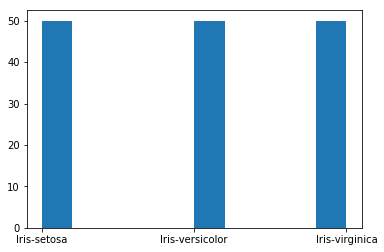

In [13]:
plt.hist([y])

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

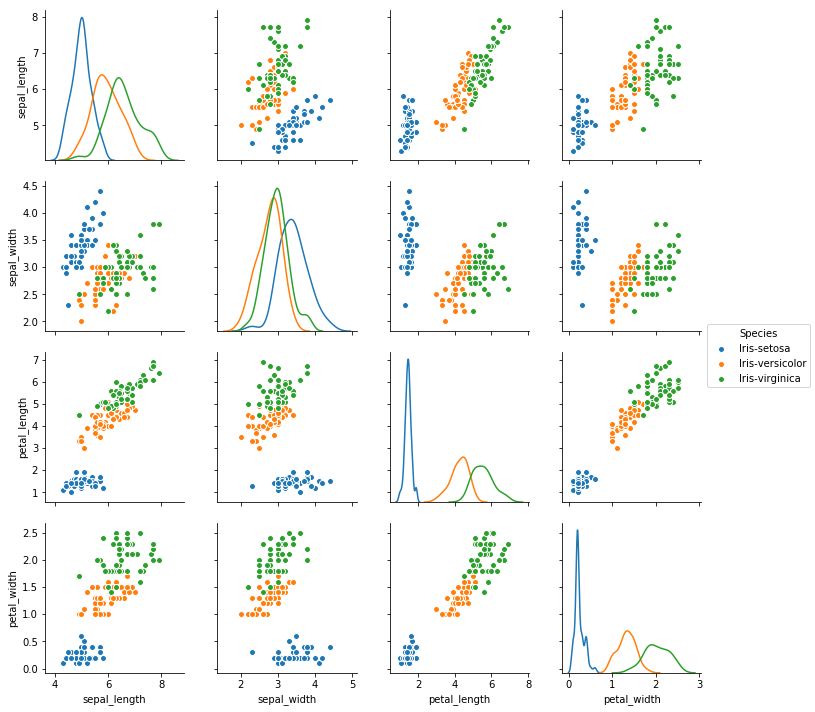

In [14]:
sns.pairplot(df, diag_kind='kde',hue='Species') 

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [15]:
#Drop Id variable from data

### Correlation among all variables and give your insights (1 Marks)

In [16]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
df['Species'] = labelencoder_X.fit_transform(df['Species'])
df.sample(5,random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,Species
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2


In [18]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,Species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


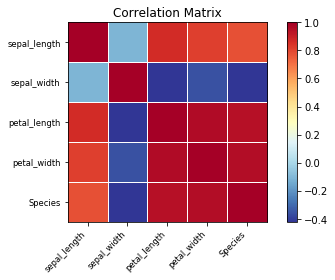

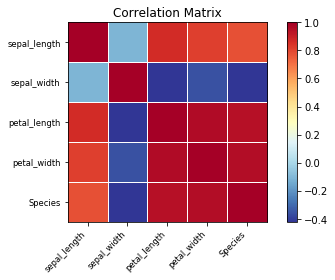

In [19]:
import statsmodels.graphics.api as smg
smg.plot_corr(df.corr(),xnames=list(df.corr().columns))

### Split data in Training and Validation in 80:20 (1 Marks)

In [20]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

### Do Feature Scaling ( 1 Marks)

In [21]:
# Use StandardScaler or similar methods

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

y = df['Species']
X = df[['petal_width','sepal_length','sepal_width']]
X = std_scale.fit_transform(X)

#Because we have scaled the features, we should re-split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=2)

### Train and Fit NaiveBayes Model(2 Marks)

In [22]:
#Fit the model
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [23]:
NB.score(X_train, y_train)

0.9416666666666667

In [24]:
#Predict
predict_labels = NB.predict(X_test)
predict_labels

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [25]:
# show Confusion Matrix
print(metrics.confusion_matrix(y_test, predict_labels))  

[[14  0  0]
 [ 0  6  2]
 [ 0  0  8]]


In [26]:
# show accuracy
metrics.accuracy_score(y_test,predict_labels)

0.9333333333333333

In [27]:
#Show precision and Recall metrics
print(metrics.classification_report(y_test, predict_labels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      0.75      0.86         8
          2       0.80      1.00      0.89         8

avg / total       0.95      0.93      0.93        30

